#Mouting Directory on Driver

In [ ]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=cb785dbe9ce970bc214b4fd218787b9895f7ef7f8f076d2121cdbbda62f5564e
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [ ]:
import import_ipynb
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! pwd
%cd drive/MyDrive
%cd Colab-Super_resolution/

Mounted at /content/drive
/content
/content/drive/MyDrive
/content/drive/MyDrive/Colab-Super_resolution


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c57d8b04-2a9d-4eb5-6581-7cac6740a707)


#Loading and visualize dataset

In [ ]:
import LoadingDataset  as dataset_loader

importing Jupyter notebook from LoadingDataset.ipynb
import libary...


In [ ]:
dataset=dataset_loader.load_dataset(key='div2k/bicubic_x4')

using tensorflow_datasets to load the dataset 
loading dataset...
EXTRACTING {'train_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip', 'valid_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X4.zip', 'train_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip', 'valid_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip'}


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/div2k/bicubic_x4/2.0.0.incompleteJ7CJ56/div2k-train.tfrecord


  0%|          | 0/800 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/div2k/bicubic_x4/2.0.0.incompleteJ7CJ56/div2k-validation.tfrecord


  0%|          | 0/100 [00:00<?, ? examples/s]

Dataset div2k downloaded and prepared to /root/tensorflow_datasets/div2k/bicubic_x4/2.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='div2k',
    version=2.0.0,
    description='DIV2K dataset: DIVerse 2K resolution high quality images as used for the challenges @ NTIRE (CVPR 2017 and CVPR 2018) and @ PIRM (ECCV 2018)',
    homepage='https://data.vision.ee.ethz.ch/cvl/DIV2K/',
    features=FeaturesDict({
        'hr': Image(shape=(None, None, 3), dtype=tf.uint8),
        'lr': Image(shape=(None, None, 3), dtype=tf.uint8),
    }),
    total_num_examples=900,
    splits={
        'train': 800,
        'validation': 100,
    },
    supervised_keys=('lr', 'hr'),
    citation="""@InProceedings{Agustsson_2017_CVPR_Workshops,
    	author = {Agustsson, Eirikur and Timofte, Radu},
    	title = {NTIRE 2017 Challenge on Single Image Super-Resolution: Dataset and Study},
    	booktitle = {The IEEE Conference on Computer Vision and Pattern Recognition (CVPR) Workshops},


In [ ]:
set5 = dataset_loader.Load_dataset_from_directory('/content/drive/MyDrive/Dataset/Evaluate_dataset/Set5')
set14 = dataset_loader.Load_dataset_from_directory('/content/drive/MyDrive/Dataset/Evaluate_dataset/Set14')
# bsd100 = dataset_loader.Load_dataset_from_directory('/content/drive/MyDrive/Dataset/Evaluate_dataset/BSDS100')

In [ ]:
(train, validate) ,meta = dataset

**Preprocessing data**

In [ ]:
crop_size = 128
batch = 16
def preprocessing_data(data,buffer_size=800,batch_size=16,repeat_time=None,is_shuffle=True,is_augment=True,cropped_size=128):
  data = data.cache()
  data = data.map(lambda lr,hr:(dataset_loader.random_crop(lr,hr,cropped_size,4)), num_parallel_calls=tf.data.AUTOTUNE)
  data = data.map(lambda lr,hr:( dataset_loader.normalize_img(lr),dataset_loader.normalize_img(hr)), num_parallel_calls=tf.data.AUTOTUNE)
  if is_shuffle==True:
    data = data.shuffle(buffer_size)
  if is_augment==True:
    data = data.map(dataset_loader.augment,num_parallel_calls=tf.data.AUTOTUNE)
  data = data.batch(batch_size,drop_remainder=True)
  data = data.repeat(repeat_time)  
  data = data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
  return data

Preprocessing for training data, with augmentation.

In [ ]:
train = preprocessing_data(train,buffer_size=800,batch_size=batch,repeat_time=-1,cropped_size=crop_size,is_augment=True)

Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`


In [ ]:
face_train = preprocessing_data(face_dataset,buffer_size=len(face_train),batch_size=batch,repeat_time=-1,cropped_size=crop_size,is_augment=True)

In [ ]:
face_validate = preprocessing_data(face_validate,buffer_size=len(face_validate),batch_size=batch,repeat_time=1,cropped_size=crop_size,is_augment=False)

Preprocessing for validate data.

In [ ]:
validate_size=128

In [ ]:
validate  = preprocessing_data(validate,buffer_size=len(validate),batch_size=batch,repeat_time=1,cropped_size=crop_size,is_augment=False)
set5      = preprocessing_data(set5,buffer_size=len(set5),batch_size=1,repeat_time=1,cropped_size=validate_size,is_augment=False)
set14     = preprocessing_data(set14,buffer_size=len(set14),batch_size=1,repeat_time=1,cropped_size=validate_size,is_augment=False)

Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`


In [ ]:
#Preprocessing single image for validate after training
set5 = set5.map(lambda a,b:(dataset_loader.normalize_img(a),dataset_loader.normalize_img(b)))
set14 = set14.map(lambda a,b:(dataset_loader.normalize_img(a),dataset_loader.normalize_img(b)))
set14=set14.batch(1)
set5=set5.batch(1)

Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`
Normalizes images: `uint8` -> `float32`


Load model from the SavedModel format

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Model/Generator/last_version_12_96')

In [ ]:
for i in set14.take(14):
  count=0
  lr  = i[0]
  sr  = tf.expand_dims(tf.keras.utils.img_to_array(
    dataset_loader.get_sr_image(model, lr[0], max_image_dimension=512, patch_size=96, batch_size=16), data_format='channels_last', dtype=None
), axis=0)
  bicubic = tf.expand_dims(tf.image.resize(lr[0], [sr[0].shape[0],sr[0].shape[1]], method=tf.image.ResizeMethod.BICUBIC),axis=0)
  hr  = tf.expand_dims(tf.image.resize(i[1][0], [sr[0].shape[0],sr[0].shape[1]], method=tf.image.ResizeMethod.BICUBIC),axis=0)
  # tf.keras.utils.save_img(
  #       '/content/drive/MyDrive/Image-sr/Untitled folder/img{}.png'.format(str(count)+'sr'),sr[0]
  # )
  dataset_loader.show(lr[0],'low resolution',80)
  dataset_loader.show(bicubic[0],'bicubic',80)
  dataset_loader.show(sr[0],'super resolution',80)
  dataset_loader.show(tf.image.adjust_jpeg_quality(
   sr[0],90
),'super resolution',80)
  dataset_loader.show(hr[0],'high resolution',80)


Output hidden; open in https://colab.research.google.com to view.

##Setup for training PSNR Oriented

In [ ]:
import ModuleArchitecture as architecture
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Add, Lambda, LeakyReLU, Flatten, Dense,PReLU,Concatenate
from tensorflow.keras.layers import PReLU
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import pandas as pd

importing Jupyter notebook from ModuleArchitecture.ipynb


Building Generator model by calling API funciton from ModuleArchitecture notebook.

In [ ]:
generator = architecture.build_generator(kn_construc=3,no_dense_per_res=2,no_dense=5,no_resblock=12,no_filter=96)

Second model for compare work

In [ ]:
#counting number of layer
no_conv,no_add,no_concatenate,no_activation=0,0,0,0
for i in range(len(generator.layers)):
  if(type(generator.layers[i])==keras.layers.Concatenate):
    no_concatenate=no_concatenate+1
  if(type(generator.layers[i])==keras.layers.Add):
    no_add=no_add+1
  if(type(generator.layers[i])==keras.layers.PReLU):
    no_activation=no_activation+1
  if(type(generator.layers[i])==keras.layers.Conv2D):
    no_conv=no_conv+1
print('total layer: ',len(generator.layers))
print('conv_layer:',no_conv)
print('Add_layer:',no_add)
print('Concatenate_layer:',no_concatenate)
print('Activation_layer:',no_activation)

total layer:  398
conv_layer: 126
Add_layer: 37
Concatenate_layer: 96
Activation_layer: 100


**Saving entire model include model Weight, architecture, state training **

In [ ]:
# generator.save('/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Model/Generator/last_version_12_96')

Plot the architecture to image

In [ ]:
tf.keras.utils.plot_model(generator, "generator.png", show_shapes=True, expand_nested=True)

*   Train generator seperately with MAE creating subclass model to do it.
*   In other work we can train it with more loss like Perceptual loss 

In [ ]:
class Generator_implementation(tf.keras.Model):
  def __init__(self,generator,only_contentloss=True):
    super(Generator_implementation,self).__init__()
    self.generator=generator
    self.only_contentloss=only_contentloss
  def compile(
        self,
        content_loss,
        feature_loss,
        style_loss,
        alpha,
        beta,
        gamma,
        psnr,
        ssim,
        g_optimizer,
    ):
        super(Generator_implementation, self).compile()
        self.content_loss = content_loss
        self.feature_loss = feature_loss
        self.style_loss=style_loss
        self.g_optimizer = g_optimizer
        self.alpha=alpha
        self.beta=beta
        self.gamma=gamma
        self.psnr=psnr
        self.ssim=ssim
  @property
  def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [self.psnr, self.ssim]
  def test_step(self, data):
        # Unpack the data
        low_img, high_img  = data
        # Compute predictions
        super_img = self.generator(low_img)
        # Updates the metrics tracking the loss
        # Update the metrics.
        self.psnr.update_state(super_img,high_img)
        self.ssim.update_state(super_img,high_img)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics}    
  #define own training step
  def train_step(self,batch_data):
    low_img, high_img  = batch_data
    if(self.only_contentloss):
      with tf.GradientTape() as tape:
            super_img = self.generator(low_img, training=True)
            ct_loss = self.content_loss(super_img,high_img)
      grads = tape.gradient(ct_loss, self.generator.trainable_variables)
      self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))
      return {'content_loss':ct_loss}
    else:        
      with tf.GradientTape() as tape:
              super_img = self.generator(low_img, training=True)
              ct_loss = self.alpha*self.content_loss(super_img,high_img)
              ft_loss = self.beta*self.feature_loss(super_img,high_img)
              s_loss = self.gamma*self.style_loss(super_img,high_img)
              loss = ct_loss + ft_loss + s_loss
      grads = tape.gradient(loss, self.generator.trainable_variables)
      self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))
      return {'content_loss':ct_loss,
              'feature_loss':ft_loss,
              'style_loss':s_loss}

In [ ]:
generator_monitor=Generator_implementation(generator,only_contentloss=True)

###Compile model and creating the checkpoint for generator

Content loss by MAE

In [ ]:
content_loss=architecture.loss_compute(type='l1')

Create metrics Object for validate model

In [ ]:
class Metrics_subclass(tf.keras.metrics.Metric):
  def __init__(self, name,function_metrics, **kwargs):
    super(Metrics_subclass, self).__init__(name=name, **kwargs)
    self.value    = tf.Variable(0.)
    self.function_metrics  = function_metrics
    self.count    = tf.Variable(0)
  def update_state(self, sr_img, hr_img):
    self.count.assign_add(1)
    metrics_computed  = self.function_metrics(sr_img,hr_img)
    if(int(self.count)>1):
      current_value=self.value
      counting = tf.cast(self.count,dtype=tf.float32)
      self.value.assign((current_value*(counting-1))/counting + metrics_computed/counting)
    else:
      self.value.assign(metrics_computed)
  def result(self):
    return self.value
  def reset_state(self):
    self.value.assign(0)
    self.count.assign(0)

In [ ]:
ssim_function=architecture.ssim_metrics()
psnr_function=architecture.psnr_metrics()

In [ ]:
ssim_metric = Metrics_subclass(name='ssim',function_metrics=ssim_function) 
psnr_metric = Metrics_subclass(name='psnr',function_metrics=psnr_function) 

**Create the checkpoint for training generator processes at Stage 1**

Saving training detail of validate model on validate Dataset

In [ ]:
import pandas as pd
class Generator_implementation_Callbacks(tf.keras.callbacks.Callback):
    def __init__(self,name, validate, generator,ckpt,file_name='/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/Stage1/validate_metrics.csv'):
      self.name     = name
      self.validate = validate
      self.generator=generator
      self.file_name=file_name
      self.ckpt = ckpt
    def on_epoch_end(self, epoch, logs=None):
        psnr = tf.get_static_value(tf.reduce_mean([psnr_function(self.generator(sr),hr) for sr,hr in self.validate.take(len(self.validate))]))
        ssim = tf.get_static_value(tf.reduce_mean([ssim_function(self.generator(sr),hr) for sr,hr in self.validate.take(len(self.validate))]))
        header=False
        if(self.ckpt.step==0):
          print('\nCreating csv file for ',self.name)
          header=True
          data={'step':[self.ckpt.step.numpy()],'psnr':[psnr],'ssim':[ssim]}
        else:  
          data={'step':[self.ckpt.step.numpy()],'psnr':[psnr],'ssim':[ssim]}
        frame=pd.DataFrame(data)
        frame.to_csv( self.file_name, mode='a', header=header, index=False)
        print('\nvalidate {} - val_sim: {} ; val_psnr: {}'.format(self.name,
            str(ssim),str(psnr)))
        print(logs)

Show image each epochs when training

In [ ]:
class Show_image_Callbacks(tf.keras.callbacks.Callback):
    def __init__(self, validate, generator):
      self.validate = validate
      self.generator=generator
    def on_epoch_begin(self, epoch, logs=None):
      if(epoch!=0):
        for key in self.validate.keys():
          for i in self.validate[key].take(1):
            #  dataset_loader.show(tf.image.resize(i[0][0], [i[0][0].shape[0]*4,i[0][0].shape[1]*4], method=tf.image.ResizeMethod.BICUBIC),'Low resolution')
            dataset_loader.show(self.generator(tf.expand_dims(i[0][0],axis=0))[0],'Low resolution '+ key,80)
            dataset_loader.show(i[1][0],'High resolution '+key,80)
 

Saving the checkpoint for stage 1 for long time running

*   First the checkpoint will saving after "epochs" and final training epochs every time training 
*   Second decay the "learning rate" by "decay_factor"
*  Third auto restore checkpoint when retrain




In [ ]:
import time
class Checkpoint_callbacks(tf.keras.callbacks.Callback):
    def __init__(self,manager,ckpt,epochs=10,decay_step=50,decay_factor=0.5,intial_lr=2e-4):
      self.manager=manager
      self.ckpt=ckpt
      self.epochs=epochs
      self.decay_step = decay_step
      self.decay_factor =  decay_factor
      self.start_time=time.time()
      self.intial_lr=intial_lr
    def on_train_begin(self, logs=None):
      self.ckpt.restore(self.manager.latest_checkpoint)
      self.start_time=time.time()
      if self.manager.latest_checkpoint:
          print("Restored from {}".format(self.manager.latest_checkpoint))
      else:
          print("Initializing from scratch.")
    def on_train_end(self, logs=None):
      duration = (time.time() - self.start_time)/60
      self.ckpt.time.assign_add(duration)
      save_path = self.manager.save()
      print("\nSaved checkpoint for final step {}: {}".format(int(self.ckpt.step), save_path))
    def on_epoch_end(self, epoch, logs=None):
     self.ckpt.step.assign_add(1)
     #make decay learning rate, decay by decay_step and decay_factor lr(1-a)**step
     print('\nleanring rate:{}'.format(str(self.ckpt.g_optimizer._decayed_lr(tf.float32))))
     if int(self.ckpt.step) % self.decay_step == 0:
        # lr_current = self.ckpt.g_optimizer.learning_rate
        self.ckpt.g_optimizer.learning_rate = self.intial_lr*(1 - self.decay_factor)**(int(self.ckpt.step) / self.decay_step)
        print('\ndecay learning rate: {}'.format(self.ckpt.g_optimizer.learning_rate))
     if int(self.ckpt.step) % self.epochs == 0:
      duration = (time.time() - self.start_time)/60
      self.ckpt.time.assign_add(duration)
      self.start_time = time.time()
      save_path = self.manager.save()
      print("\nSaved checkpoint for step {}: {}".format(int(self.ckpt.step), save_path))

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Checkpoint_weight/Generator/ckpt_12_96"
g_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)
ckpt = tf.train.Checkpoint(step=tf.Variable(0),time=tf.Variable(0.),generator=generator5,g_optimizer=g_optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=2)
generator_callback=Checkpoint_callbacks(ckpt=ckpt,manager=ckpt_manager,epochs=3,decay_step=100,decay_factor=0.5)

In [ ]:
print(ckpt.step.numpy())
#time by minutes
print(ckpt.time.numpy())
print(ckpt.g_optimizer._decayed_lr(tf.float32))
print(ckpt_manager.checkpoints)

400
2425.3162
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.25e-05>
['/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Checkpoint_weight/Generator/ckpt_12_96/ckpt-141', '/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Checkpoint_weight/Generator/ckpt_12_96/ckpt-142']


Restore the checkpoint for every time we retrain

In [ ]:
ckpt.restore(
'/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Checkpoint_weight/Generator/ckpt_12_96/ckpt-142')

**Compile Subclass model**

In [ ]:
generator_monitor.compile(
    content_loss=content_loss,
    g_optimizer=g_optimizer,
    feature_loss=feature_loss,
    style_loss=style_loss,
    alpha=1,
    beta=0,
    gamma=0,
    psnr=psnr_metric,
    ssim=ssim_metric)



*  Creating CSV file for saving training detail
*   Creating the callbacks for training



In [ ]:
validate_set5=Generator_implementation_Callbacks('set5',set5,generator,ckpt,file_name='/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/PSNR_training/validate_metrics_set5.csv')
validate_set14=Generator_implementation_Callbacks('set14',set14,generator,ckpt,file_name='/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/PSNR_training/validate_metrics_set14.csv')

In [ ]:
image_data  = {'set5':set5,
               'set14':set14,
               'validate':validate}
image_callbacks = Show_image_Callbacks(image_data,generator)               

In [ ]:
csv_logger_stage1 = tf.keras.callbacks.CSVLogger(
    '/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/PSNR_training/ESRGAN_12r_96_stage1.csv'
    ,',',append=True)

Set up epochs, step and training

In [ ]:
#,callbacks=[callback_monitor,generator_callback,csv_logger
history=generator_monitor.fit(train,steps_per_epoch=1000,epochs=400,initial_epoch=350,validation_data=validate,callbacks=[validate_set5,validate_set14,generator_callback,image_callbacks,csv_logger_stage1])

Output hidden; open in https://colab.research.google.com to view.

Checking detail value again

In [ ]:
psnr=[]
ssim=[]
ct_loss=[]
ft_loss=[]
s_loss=[]
for i in range(1):
  psnr.append(tf.reduce_mean([psnr_metric(generator(sr),hr) for sr,hr in validate.take(len(validate))]))
  print()
  ssim.append(tf.reduce_mean([ssim_metric(generator(sr),hr) for sr,hr in validate.take(len(validate))]))
  print()
  ct_loss.append(tf.reduce_mean([content_loss(generator(sr),hr) for sr,hr in validate.take(len(validate))]))
  print()
  ft_loss.append(tf.reduce_mean([feature_loss(generator(sr),hr) for sr,hr in validate.take(len(validate))]))
  print()
  s_loss.append(tf.reduce_mean([style_loss(generator(sr),hr) for sr,hr in validate.take(len(validate))]))
  print()
print(psnr,ssim,ct_loss,ft_loss,s_loss)

In [ ]:
print(tf.reduce_mean(psnr))
print(tf.reduce_mean(ssim))
print(tf.reduce_mean(ct_loss))
print(tf.reduce_mean(ft_loss))
print(tf.reduce_mean(s_loss))

Plot graph of training detail

In [ ]:
def plot_graph(history,name,ylabel='loss',xlabel='value'):
  plt.plot(history[name].values.tolist())
# plt.plot(his/tory.history['feature_loss'])
  plt.title(name)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.legend([name], loc='upper left')
  plt.show()
def plot_graph_gan(history,generator_name,discriminator_name):
    plt.plot(history[discriminator_name].values.tolist())
    plt.plot(history[generator_name].values.tolist())
    plt.title('Adversarial Loss')
    plt.ylabel('value')
    plt.xlabel('epoch')
    plt.legend(['d_loss','g_loss'], loc='upper left')
    plt.show()
def compute_mean_std(history,name):
    print('Mean: '+str(tf.reduce_mean(history[name].values.tolist())))
    print('std: '+str(tf.math.reduce_std(history[name].values.tolist())))

In [ ]:
stage1 = pd.read_csv(
    "/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/PSNR_training/ESRGAN_12r_96_stage1.csv")
stage2 = pd.read_csv(
    "/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/GAN_training/ESRGAN_12r_96_Stage2.csv")

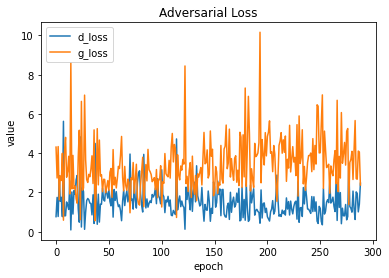

In [ ]:
plot_graph_gan(stage2,'adv_loss','d_loss')

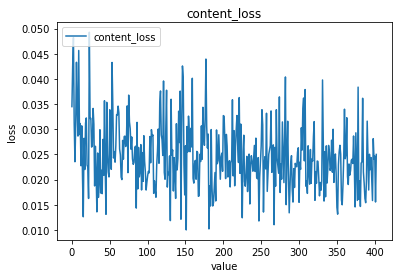

In [ ]:
plot_graph(stage1,'content_loss')

In [ ]:
compute_mean_std(stage1,'content_loss')

Mean: tf.Tensor(0.02470077, shape=(), dtype=float32)
std: tf.Tensor(0.0066088196, shape=(), dtype=float32)


In [ ]:
# import csv
# # with open('/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/Implement_stage1/ESRGAN_12r_96_stage2_3.csv',newline='') as f:
# #     r = csv.reader(f)
# #     data = [line for line in r]
# with open('/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/Implement_stage1/ESRGAN_12r_96_stage2_3.csv','w',newline='') as f:
#     w = csv.writer(f)
#     w.writerow(['step','content_loss','psnr','ssim'])
#     w.writerows(data)

##Setup for training GAN

In [ ]:
discriminator = architecture.build_discriminator()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1conv1 (Conv2D)        (None, 128, 128, 64)      1792      
                                                                 
 leakyrelu-block1conv1 (Leak  (None, 128, 128, 64)     0         
 yReLU)                                                          
                                                                 
 block1conv2 (Conv2D)        (None, 64, 64, 64)        36928     
                                                                 
 batch_norm-block1conv2 (Bat  (None, 64, 64, 64)       256       
 chNormalization)                                                
                                                                 
 leakyrelu-block1conv2 (Leak  (None, 64, 64, 64)     

Using pretrained Generator at Stage1 for this training stage

In [ ]:
class GAN(tf.keras.Model):
  def __init__(self,discriminator,generator):
    super(GAN,self).__init__()
    self.discriminator=discriminator
    self.generator=generator
  def compile(
        self,
        content_loss,
        feature_loss,
        style_loss,
        g_loss,
        d_loss,
        alpha,
        beta,
        gamma,
        deta,
        epsilon,
        g_optimizer,
        d_optimizer,
        psnr,
        ssim,
    ):
        super(GAN, self).compile()
        self.content_loss = content_loss
        self.feature_loss = feature_loss
        self.style_loss = style_loss
        self.g_loss = g_loss
        self.d_loss = d_loss
        self.alpha=alpha
        self.beta=beta
        self.gamma=gamma
        self.deta=deta
        self.epsilon=epsilon
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.psnr = psnr
        self.ssim = ssim
  def test_step(self, data):
        # Unpack the data
        low_img, high_img  = data
        # Compute predictions
        super_img = self.generator(low_img,training=False)
        # Updates the metrics tracking the loss
        # Update the metrics.
        self.psnr.update_state(super_img,high_img)
        self.ssim.update_state(super_img,high_img)
        # Return a dict mapping metric names to current value.
        # Note that it will include the loss (tracked in self.metrics).
        return {m.name: m.result() for m in self.metrics}    
  @property
  def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [self.psnr, self.ssim]
  def train_step(self,batch_data):
    low_img,high_img=batch_data
    with tf.GradientTape(persistent=True) as tape:
       super_img  = self.generator(low_img, training=True)
       predict_sr = self.discriminator(super_img, training=True)
       predict_hr = self.discriminator(high_img, training=True)

       ct_loss  = self.alpha*self.content_loss(super_img,high_img) 
       ft_loss  = self.beta*self.feature_loss(super_img,high_img)
       st_loss  = self.gamma*self.style_loss(super_img,high_img)
       adv_loss = self.g_loss(predict_sr,predict_hr)
       generator_loss = ct_loss + ft_loss + st_loss + self.deta*adv_loss
       d_loss = self.epsilon*self.d_loss(predict_sr,predict_hr)
    grads_G = tape.gradient(
            generator_loss, self.generator.trainable_variables)
    grads_D = tape.gradient(
            d_loss, self.discriminator.trainable_variables) 
    self.g_optimizer.apply_gradients(
            zip(grads_G, self.generator.trainable_variables))
    self.d_optimizer.apply_gradients(
            zip(grads_D, self.discriminator.trainable_variables))
    #adv_loss its mean g_loss
    return {
        'content_loss':ct_loss,
        'feature_loss':ft_loss,
        'style_loss':st_loss,
        'adv_loss': adv_loss,
        'total_g_loss':generator_loss,
        'd_loss':d_loss,
        'gan_loss':adv_loss + d_loss
    }

Defined Losses and Metrics for Gan training

In [ ]:
class Metrics_subclass(tf.keras.metrics.Metric):
  def __init__(self, name,function_metrics, **kwargs):
    super(Metrics_subclass, self).__init__(name=name, **kwargs)
    self.value    = tf.Variable(0.)
    self.function_metrics  = function_metrics
    self.count    = tf.Variable(0)
  def update_state(self, sr_img, hr_img):
    self.count.assign_add(1)
    metrics_computed  = self.function_metrics(sr_img,hr_img)
    if(int(self.count)>1):
      current_value=self.value
      counting = tf.cast(self.count,dtype=tf.float32)
      self.value.assign((current_value*(counting-1))/counting + metrics_computed/counting)
    else:
      self.value.assign(metrics_computed)
  def result(self):
    return self.value
  def reset_state(self):
    self.value.assign(0)
    self.count.assign(0)
ssim_function=architecture.ssim_metrics()
psnr_function=architecture.psnr_metrics()
ssim_metric = Metrics_subclass(name='ssim',function_metrics=ssim_function) 
psnr_metric = Metrics_subclass(name='psnr',function_metrics=psnr_function) 

In [ ]:
content_loss  = architecture.loss_compute(type='l1')
feature_loss  = architecture.feature_loss(type_loss='l1',index_layer=20)
style_loss    = architecture.style_loss()
g_loss        = architecture.generator_loss(with_relativistic=True,type_loss='lsgan')
d_loss        = architecture.discriminator_loss(with_relativistic=True,type_loss='lsgan')

80150528/80134624 [==============================] - 0s 0us/step


Creating the GAN checkpoint for training

*   First saving the Checkpoint each "epochs" when training
*   Compute and saving time traning, show the current learning rate
* Auto restore checkpoint when retrain



In [ ]:
import time
class Checkpoint_callbacks_gan(tf.keras.callbacks.Callback):
    def __init__(self,manager,ckpt,epochs=10):
      self.manager=manager
      self.ckpt=ckpt
      self.epochs=epochs
      self.start_time=time.time()
    def on_train_begin(self, logs=None):
      self.ckpt.restore(self.manager.latest_checkpoint)
      self.start_time=time.time()
      if self.manager.latest_checkpoint:
          print("Restored from {}".format(self.manager.latest_checkpoint))
      else:
          print("Initializing from scratch.")

    def on_train_end(self, logs=None):
      duration = (time.time() - self.start_time)/60
      self.ckpt.time.assign_add(duration)
      save_path = self.manager.save()
      print("\nSaved checkpoint for final step {} : {}".format(int(self.ckpt.step),save_path))
    def on_epoch_end(self, epoch, logs=None):
     self.ckpt.step.assign_add(1)
     print('\nleanring rate for generator: {}'.format(str(self.ckpt.g_optimizer._decayed_lr(tf.float32))))
     print('\nleanring rate for discriminator: {}'.format(str(self.ckpt.d_optimizer._decayed_lr(tf.float32))))
     if int(self.ckpt.step) % self.epochs == 0:
      duration = (time.time() - self.start_time)/60
      self.ckpt.time.assign_add(duration)
      self.start_time = time.time()
      save_path = self.manager.save()
      print("\nSaved checkpoint for step {} : {}".format(int(self.ckpt.step),save_path))

Create the checkpoint for both discriminator and generator, using PiecewiseConstantDecay for this training stage

In [ ]:
gan_checkpoint_path = "/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Checkpoint_weight/Gan/ckpt_12_96_3"
g_lr_schedule= keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5e4,1e5,2e5,3e5], values=[1e-4, 5e-5, 2.5e-5, 1.25e-5, 6.25e-06])
g_optimizer = tf.keras.optimizers.Adam(learning_rate=g_lr_schedule)

d_lr_schedule= keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[5e4,1e5,2e5,3e5], values=[1e-4, 5e-5, 2.5e-5, 1.25e-5, 6.25e-06])
d_optimizer = tf.keras.optimizers.Adam(learning_rate=d_lr_schedule)

gan_ckpt = tf.train.Checkpoint(step=tf.Variable(0),
                              time=tf.Variable(0.),
                              discriminator=discriminator,
                              generator=generator,
                              d_optimizer=d_optimizer,
                              g_optimizer=g_optimizer
                              )
gan_ckpt_manager = tf.train.CheckpointManager(gan_ckpt, gan_checkpoint_path, max_to_keep=3)
gan_callback=Checkpoint_callbacks_gan(ckpt=gan_ckpt,manager=gan_ckpt_manager,epochs=3)

In [ ]:
print(gan_ckpt.step.numpy())
print(gan_ckpt.time.numpy()
          /60)

96
13.888248697916667


In [ ]:
gan_ckpt.restore('/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Checkpoint_weight/Gan/ckpt_12_96_3/ckpt-33')

Compiled and training GAN model

In [ ]:
gan = GAN(generator=generator,discriminator=discriminator)

Building a callbacks

In [ ]:
validate_set5_stage2=Generator_implementation_Callbacks('set5',set5,generator,gan_ckpt,file_name='/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/Testing Architecture/validate_metrics_set5_3.csv')
validate_set14_stage2=Generator_implementation_Callbacks('set14',set14,generator,gan_ckpt,file_name='/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/Testing Architecture/validate_metrics_set14_3.csv')
image_data  = {'set5':set5,
               'set14':set14,
               'validate':validate}
image_callbacks_stage2 = Show_image_Callbacks(image_data,generator)    
csv_logger_stage2 = tf.keras.callbacks.CSVLogger(
    '/content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Logger_History/Testing Architecture/ESRGAN_12r_96_3.csv'
    ,',',append=True)           

Loss is compute with:


*   generator_loss= alpha * content_loss + beta * feature_loss + gamma * style_loss + deta*adv_loss 
*   discriminator_loss = epsilon * adv_loss




In [ ]:
gan.compile(content_loss=content_loss,feature_loss=feature_loss,style_loss=style_loss,g_loss=g_loss,d_loss=d_loss
            ,alpha=1e-2
            ,beta=0.006
            ,gamma=1
            ,deta=5e-3
            ,epsilon=1
            ,d_optimizer=d_optimizer
            ,g_optimizer=g_optimizer
            ,psnr=psnr_metric
            ,ssim=ssim_metric)

Restored from /content/drive/MyDrive/Colab-Super_resolution/Pretrained_data/Checkpoint_weight/Gan/ckpt_12_96_3/ckpt-31


Epoch 91/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.2991e-04 - feature_loss: 0.0488 - style_loss: 8.1628e-05 - adv_loss: 2.8396 - total_g_loss: 0.0635 - d_loss: 1.7412 - gan_loss: 4.5809
validate set5 - val_sim: 0.74966705 ; val_psnr: 25.013731
{'content_loss': 0.00048623315524309874, 'feature_loss': 0.05690454691648483, 'style_loss': 5.3499723435379565e-05, 'adv_loss': 2.170074939727783, 'total_g_loss': 0.06829465925693512, 'd_loss': 1.9711699485778809, 'gan_loss': 4.141244888305664, 'val_psnr': 25.518112182617188, 'val_ssim': 0.6578001976013184}

validate set14 - val_sim: 0.52787906 ; val_psnr: 20.939589
{'content_loss': 0.00048623315524309874, 'feature_loss': 0.05690454691648483, 'style_loss': 5.3499723435379565e-05, 'adv_loss': 2.170074939727783, 'total_g_loss': 0.06829465925693512, 'd_loss': 1.9711699485778809, 'gan_loss': 4.141244888305664, 'val_psnr': 25.518112182617188, 'val_ssim': 0.6578001976013184}

leanring rate for generator: tf.Tensor(5e-05

Epoch 92/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.2255e-04 - feature_loss: 0.0483 - style_loss: 7.7535e-05 - adv_loss: 2.4903 - total_g_loss: 0.0612 - d_loss: 1.9227 - gan_loss: 4.4130
validate set5 - val_sim: 0.76363 ; val_psnr: 27.070435
{'content_loss': 0.000580143416300416, 'feature_loss': 0.062376707792282104, 'style_loss': 8.702192280907184e-05, 'adv_loss': 4.413410663604736, 'total_g_loss': 0.08511093258857727, 'd_loss': 0.7095317840576172, 'gan_loss': 5.1229424476623535, 'val_psnr': 25.493602752685547, 'val_ssim': 0.7043240070343018}

validate set14 - val_sim: 0.6048295 ; val_psnr: 22.519485
{'content_loss': 0.000580143416300416, 'feature_loss': 0.062376707792282104, 'style_loss': 8.702192280907184e-05, 'adv_loss': 4.413410663604736, 'total_g_loss': 0.08511093258857727, 'd_loss': 0.7095317840576172, 'gan_loss': 5.1229424476623535, 'val_psnr': 25.493602752685547, 'val_ssim': 0.7043240070343018}

leanring rate for generator: tf.Tensor(5e-05, shap

Epoch 93/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.7747e-04 - feature_loss: 0.0498 - style_loss: 8.3646e-05 - adv_loss: 2.8547 - total_g_loss: 0.0647 - d_loss: 1.7457 - gan_loss: 4.6004
validate set5 - val_sim: 0.7594662 ; val_psnr: 28.007502
{'content_loss': 0.0003266516141593456, 'feature_loss': 0.04375317320227623, 'style_loss': 7.77732566348277e-05, 'adv_loss': 3.6772940158843994, 'total_g_loss': 0.0625440701842308, 'd_loss': 0.8732969164848328, 'gan_loss': 4.550590991973877, 'val_psnr': 27.15322494506836, 'val_ssim': 0.7452120184898376}

validate set14 - val_sim: 0.62090665 ; val_psnr: 24.817514
{'content_loss': 0.0003266516141593456, 'feature_loss': 0.04375317320227623, 'style_loss': 7.77732566348277e-05, 'adv_loss': 3.6772940158843994, 'total_g_loss': 0.0625440701842308, 'd_loss': 0.8732969164848328, 'gan_loss': 4.550590991973877, 'val_psnr': 27.15322494506836, 'val_ssim': 0.7452120184898376}

leanring rate for generator: tf.Tensor(5e-05, shape=(

LoadingDataset.ipynb:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Epoch 94/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.6710e-04 - feature_loss: 0.0494 - style_loss: 8.3465e-05 - adv_loss: 2.8003 - total_g_loss: 0.0639 - d_loss: 1.7406 - gan_loss: 4.5409
validate set5 - val_sim: 0.80287045 ; val_psnr: 28.333954
{'content_loss': 0.00031651696190238, 'feature_loss': 0.03885262832045555, 'style_loss': 1.9693863578140736e-05, 'adv_loss': 1.6153713464736938, 'total_g_loss': 0.04726569727063179, 'd_loss': 2.509310007095337, 'gan_loss': 4.12468147277832, 'val_psnr': 27.332334518432617, 'val_ssim': 0.7331449389457703}

validate set14 - val_sim: 0.57597977 ; val_psnr: 24.436184
{'content_loss': 0.00031651696190238, 'feature_loss': 0.03885262832045555, 'style_loss': 1.9693863578140736e-05, 'adv_loss': 1.6153713464736938, 'total_g_loss': 0.04726569727063179, 'd_loss': 2.509310007095337, 'gan_loss': 4.12468147277832, 'val_psnr': 27.332334518432617, 'val_ssim': 0.7331449389457703}

leanring rate for generator: tf.Tensor(5e-05, shape=

Epoch 95/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.4812e-04 - feature_loss: 0.0493 - style_loss: 8.3111e-05 - adv_loss: 2.8661 - total_g_loss: 0.0642 - d_loss: 1.7288 - gan_loss: 4.5948
validate set5 - val_sim: 0.8095943 ; val_psnr: 25.895176
{'content_loss': 0.0005481260013766587, 'feature_loss': 0.04891065135598183, 'style_loss': 0.0001100570079870522, 'adv_loss': 1.9515293836593628, 'total_g_loss': 0.059326477348804474, 'd_loss': 2.1021909713745117, 'gan_loss': 4.053720474243164, 'val_psnr': 25.19879722595215, 'val_ssim': 0.7249318361282349}

validate set14 - val_sim: 0.63866997 ; val_psnr: 21.921247
{'content_loss': 0.0005481260013766587, 'feature_loss': 0.04891065135598183, 'style_loss': 0.0001100570079870522, 'adv_loss': 1.9515293836593628, 'total_g_loss': 0.059326477348804474, 'd_loss': 2.1021909713745117, 'gan_loss': 4.053720474243164, 'val_psnr': 25.19879722595215, 'val_ssim': 0.7249318361282349}

leanring rate for generator: tf.Tensor(5e-05, s

Epoch 96/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.5442e-04 - feature_loss: 0.0487 - style_loss: 8.1470e-05 - adv_loss: 2.6630 - total_g_loss: 0.0625 - d_loss: 1.7818 - gan_loss: 4.4448
validate set5 - val_sim: 0.8241221 ; val_psnr: 28.466644
{'content_loss': 0.0003102096088696271, 'feature_loss': 0.04524228349328041, 'style_loss': 5.7060460676439106e-05, 'adv_loss': 4.362889289855957, 'total_g_loss': 0.06742400676012039, 'd_loss': 0.6428289413452148, 'gan_loss': 5.005718231201172, 'val_psnr': 27.2855224609375, 'val_ssim': 0.724092423915863}

validate set14 - val_sim: 0.64854866 ; val_psnr: 24.84818
{'content_loss': 0.0003102096088696271, 'feature_loss': 0.04524228349328041, 'style_loss': 5.7060460676439106e-05, 'adv_loss': 4.362889289855957, 'total_g_loss': 0.06742400676012039, 'd_loss': 0.6428289413452148, 'gan_loss': 5.005718231201172, 'val_psnr': 27.2855224609375, 'val_ssim': 0.724092423915863}

leanring rate for generator: tf.Tensor(5e-05, shape=()

Epoch 97/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.4210e-04 - feature_loss: 0.0486 - style_loss: 8.1999e-05 - adv_loss: 2.4911 - total_g_loss: 0.0616 - d_loss: 1.9196 - gan_loss: 4.4107
validate set5 - val_sim: 0.8036249 ; val_psnr: 27.874746
{'content_loss': 0.00047321541933342814, 'feature_loss': 0.06536222249269485, 'style_loss': 0.000156871261424385, 'adv_loss': 2.14640736579895, 'total_g_loss': 0.0767243504524231, 'd_loss': 1.92560613155365, 'gan_loss': 4.0720133781433105, 'val_psnr': 26.953182220458984, 'val_ssim': 0.748929500579834}

validate set14 - val_sim: 0.60081166 ; val_psnr: 22.788212
{'content_loss': 0.00047321541933342814, 'feature_loss': 0.06536222249269485, 'style_loss': 0.000156871261424385, 'adv_loss': 2.14640736579895, 'total_g_loss': 0.0767243504524231, 'd_loss': 1.92560613155365, 'gan_loss': 4.0720133781433105, 'val_psnr': 26.953182220458984, 'val_ssim': 0.748929500579834}

leanring rate for generator: tf.Tensor(5e-05, shape=(), d

Epoch 98/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.2991e-04 - feature_loss: 0.0489 - style_loss: 7.8994e-05 - adv_loss: 2.7499 - total_g_loss: 0.0631 - d_loss: 1.7680 - gan_loss: 4.5179
validate set5 - val_sim: 0.7678976 ; val_psnr: 27.81715
{'content_loss': 0.00033146102214232087, 'feature_loss': 0.04543263092637062, 'style_loss': 4.175918365945108e-05, 'adv_loss': 2.919936180114746, 'total_g_loss': 0.060405533760786057, 'd_loss': 1.4059381484985352, 'gan_loss': 4.325874328613281, 'val_psnr': 28.448339462280273, 'val_ssim': 0.749578595161438}

validate set14 - val_sim: 0.61930406 ; val_psnr: 24.097525
{'content_loss': 0.00033146102214232087, 'feature_loss': 0.04543263092637062, 'style_loss': 4.175918365945108e-05, 'adv_loss': 2.919936180114746, 'total_g_loss': 0.060405533760786057, 'd_loss': 1.4059381484985352, 'gan_loss': 4.325874328613281, 'val_psnr': 28.448339462280273, 'val_ssim': 0.749578595161438}

leanring rate for generator: tf.Tensor(5e-05, sh

Epoch 99/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.3694e-04 - feature_loss: 0.0491 - style_loss: 7.9810e-05 - adv_loss: 2.9494 - total_g_loss: 0.0644 - d_loss: 1.6895 - gan_loss: 4.6389
validate set5 - val_sim: 0.81810635 ; val_psnr: 27.407028
{'content_loss': 0.0004957722267135978, 'feature_loss': 0.06037692725658417, 'style_loss': 0.00012151553528383374, 'adv_loss': 3.796261787414551, 'total_g_loss': 0.07997552305459976, 'd_loss': 0.853821873664856, 'gan_loss': 4.650083541870117, 'val_psnr': 26.312076568603516, 'val_ssim': 0.6863332390785217}

validate set14 - val_sim: 0.6077227 ; val_psnr: 23.985548
{'content_loss': 0.0004957722267135978, 'feature_loss': 0.06037692725658417, 'style_loss': 0.00012151553528383374, 'adv_loss': 3.796261787414551, 'total_g_loss': 0.07997552305459976, 'd_loss': 0.853821873664856, 'gan_loss': 4.650083541870117, 'val_psnr': 26.312076568603516, 'val_ssim': 0.6863332390785217}

leanring rate for generator: tf.Tensor(5e-05, sha

Epoch 100/100
1000/1000 [==============================] - ETA: 0s - content_loss: 4.6751e-04 - feature_loss: 0.0503 - style_loss: 8.8198e-05 - adv_loss: 2.9039 - total_g_loss: 0.0653 - d_loss: 1.7368 - gan_loss: 4.6407
validate set5 - val_sim: 0.81538594 ; val_psnr: 27.545868
{'content_loss': 0.0004021363565698266, 'feature_loss': 0.04352441802620888, 'style_loss': 2.6393310690764338e-05, 'adv_loss': 3.650393009185791, 'total_g_loss': 0.06220491603016853, 'd_loss': 0.905178964138031, 'gan_loss': 4.555572032928467, 'val_psnr': 24.734020233154297, 'val_ssim': 0.7316747307777405}

validate set14 - val_sim: 0.6188391 ; val_psnr: 23.527222
{'content_loss': 0.0004021363565698266, 'feature_loss': 0.04352441802620888, 'style_loss': 2.6393310690764338e-05, 'adv_loss': 3.650393009185791, 'total_g_loss': 0.06220491603016853, 'd_loss': 0.905178964138031, 'gan_loss': 4.555572032928467, 'val_psnr': 24.734020233154297, 'val_ssim': 0.7316747307777405}

leanring rate for generator: tf.Tensor(5e-05, sh

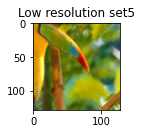

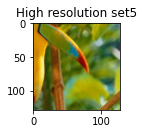

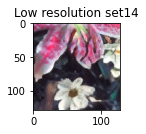

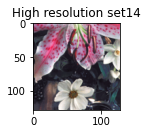

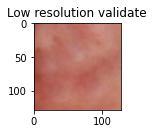

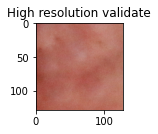

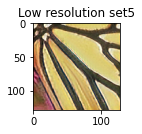

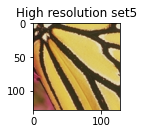

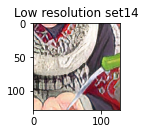

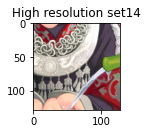

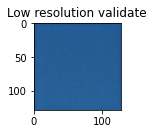

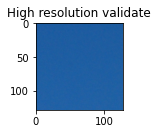

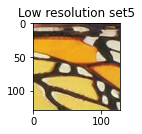

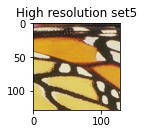

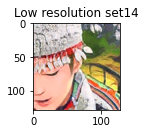

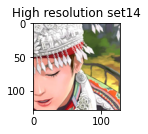

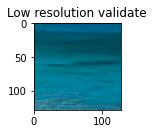

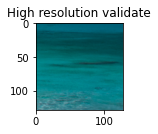

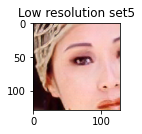

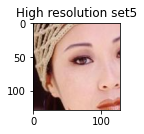

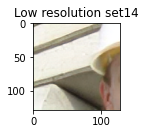

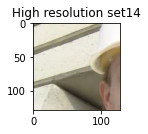

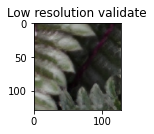

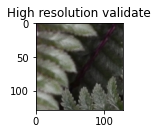

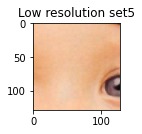

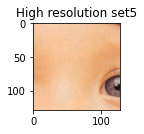

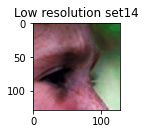

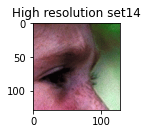

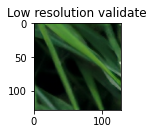

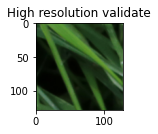

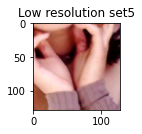

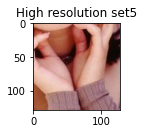

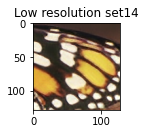

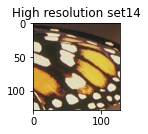

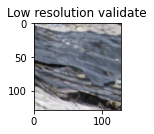

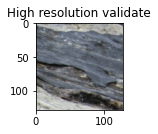

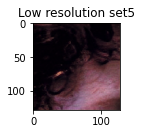

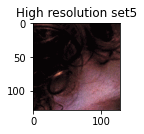

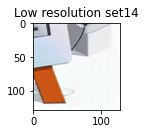

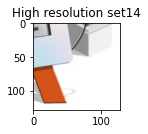

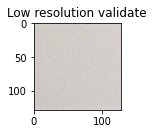

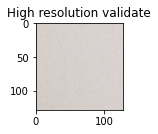

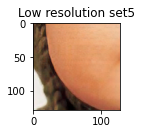

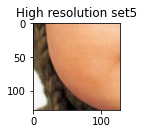

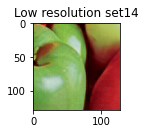

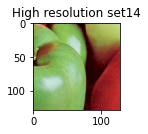

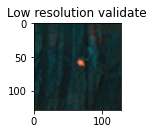

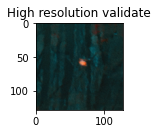

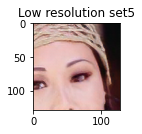

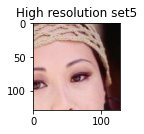

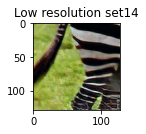

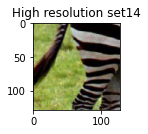

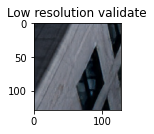

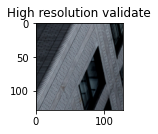

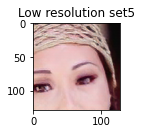

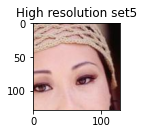

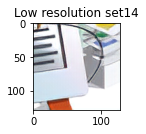

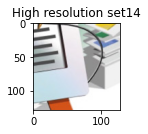

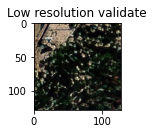

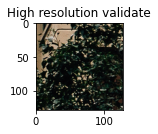

In [ ]:
history=gan.fit(train,steps_per_epoch=1000,epochs=100,initial_epoch=90,validation_data=validate,callbacks=[validate_set5_stage2,
                                                                                                            validate_set14_stage2,
                                                                                                            gan_callback,
                                                                                                            image_callbacks_stage2,
                                                                                                            csv_logger_stage2])

##Visualizing, testing and comparing

Network interpolation

In [ ]:
def change_weight(model, vars1, vars2, alpha=1.0):
    for i, var in enumerate(model.trainable_variables):
        var.assign((1 - alpha) * vars1[i] + alpha * vars2[i])
vars1 = [v.numpy() for v in generator.trainable_variables]
vars2 = [v.numpy() for v in generator2.trainable_variables]
change_weight(generator2,vars1,vars2,0.5)

---------------Feature_Loss--------------
---------------Style_Loss--------------
---------------PSNR--------------
---------------SSIM--------------
---------------


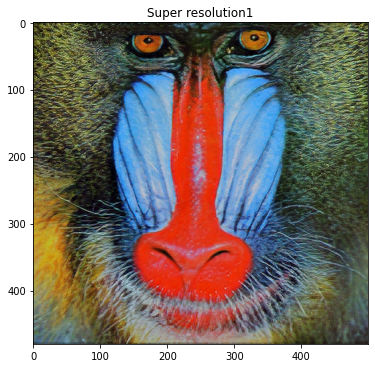

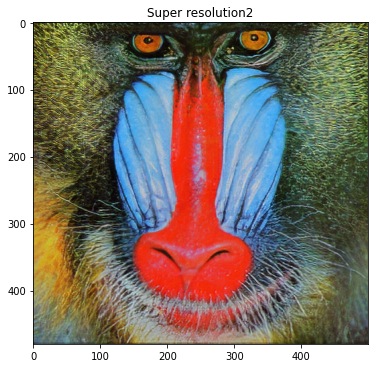

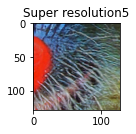

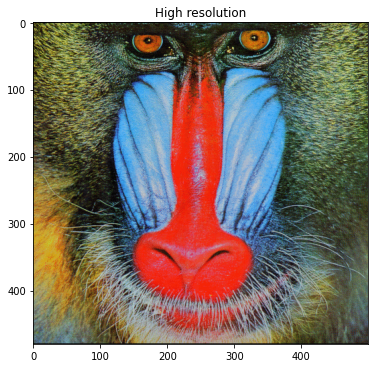

In [ ]:
for i in set14.take(1):
  sr1 =tf.expand_dims(tf.keras.utils.img_to_array(
    dataset_loader.get_sr_image(generator, i[0][0], max_image_dimension=512, patch_size=96, batch_size=16), data_format='channels_last', dtype=None
      ), axis=0)
  sr2 =tf.expand_dims(tf.keras.utils.img_to_array(
    dataset_loader.get_sr_image(generator1, i[0][0], max_image_dimension=512, patch_size=96, batch_size=16), data_format='channels_last', dtype=None
), axis=0)

  print('---------------Feature_Loss--------------')
  ft1=tf.reduce_mean(tf.image.psnr(sr1,hr,max_val=1))
  ft2=tf.reduce_mean(tf.image.psnr(sr2,hr,max_val=1))

  
  
  ss1=tf.reduce_mean(tf.image.ssim(sr1,hr,max_val=1))
  ss2=tf.reduce_mean(tf.image.ssim(sr2,hr,max_val=1))

  ff1=tf.reduce_mean(feature_loss(sr1,i[1]))
  ff2=tf.reduce_mean(feature_loss(sr2,i[1]))



  tf.keras.utils.save_img(
        '/content/drive/MyDrive/Image-sr/stage2/img{}.png'.format(str(1)+'sr_'+str(ft1.numpy())+'_'+str(ss1.numpy())+'_'+str(ff1.numpy())),sr1[0]
  )
  tf.keras.utils.save_img(
        '/content/drive/MyDrive/Image-sr/stage2/img{}.png'.format(str(2)+'sr_'+str(ft2.numpy())+'_'+str(ss2.numpy())+'_'+str(ff2.numpy())),sr2[0]
  )

  # #crop
  crop_sr1=specific_crop(50,2,sr1[0],128)
  tf.keras.utils.save_img(
        '/content/drive/MyDrive/Image-sr/stage2/img{}.png'.format(str(1)+'crop'),crop_sr1
  )
  crop_sr2=specific_crop(50,2,sr2[0],128)
  tf.keras.utils.save_img(
        '/content/drive/MyDrive/Image-sr/stage2/img{}.png'.format(str(2)+'crop'),crop_sr2
  )
  crop2_sr1=specific_crop(300,300,sr1[0],128)
  tf.keras.utils.save_img(
        '/content/drive/MyDrive/Image-sr/stage2/img{}.png'.format(str(1)+'crop2'),crop2_sr1
  )
  crop2_sr2=specific_crop(300,300,sr2[0],128)
  tf.keras.utils.save_img(
        '/content/drive/MyDrive/Image-sr/stage2/img{}.png'.format(str(2)+'crop2'),crop2_sr2
  )

  dataset_loader.show(sr1[0],'Super resolution1',80)
  dataset_loader.show(sr2[0],'Super resolution2',80)

  dataset_loader.show(crop2_sr2,'Super resolution5',80)
  dataset_loader.show(hr[0],'High resolution',80)



In [ ]:
def specific_crop(x,y, hr_img, hr_crop_size):
    hr_top = x 
    hr_left = y 
    hr_crop = hr_img[hr_top:hr_top + hr_crop_size, hr_left:hr_left + hr_crop_size]
    return  hr_crop